In [5]:
MY_PATH = ''
data_file = MY_PATH + 'sample_prediction_0.csv'
#data_file = MY_PATH + 'sample_prediction_1.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

In [6]:
df = pd.read_csv(data_file)

In [7]:
thresholds = list(np.array(list(range(0, 11, 1)))/10)
#thresholds = list(np.array(list(range(0, 101, 1)))/100)
#thresholds = list(np.array(list(range(0, 1001, 1)))/1000)

roc_point = []

for threshold in thresholds:

    tp = 0; fp = 0; fn = 0; tn = 0

    for index, instance in df.iterrows():
        actual = instance["actual"]
        prediction = instance["prediction"]

        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif actual == 1 and prediction_class == 0:
            fn = fn + 1
        elif actual == 0 and prediction_class == 1: 
            fp = fp + 1
        elif actual == 0 and prediction_class == 0:
            tn = tn + 1

    #print(tp, fp, fn, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    #print(tpr, fpr)
    roc_point.append([tpr, fpr])

In [8]:
df_scores = pd.DataFrame(roc_point, columns = ["tpr", "fpr"])
df_scores["threshold"] = thresholds

In [9]:
df_scores

,tpr,fpr,threshold
0,1.000000,1.00,0.0
1,1.000000,1.00,0.1
2,1.000000,0.75,0.2
3,1.000000,0.50,0.3
4,0.833333,0.25,0.4
5,0.666667,0.25,0.5
6,0.500000,0.00,0.6
7,0.333333,0.00,0.7
8,0.333333,0.00,0.8
9,0.000000,0.00,0.9


In [10]:
#df_scores[df_scores['threshold'] == 0.5]
df_scores[df_scores.threshold == 0.5]

,tpr,fpr,threshold
5,0.666667,0.25,0.5


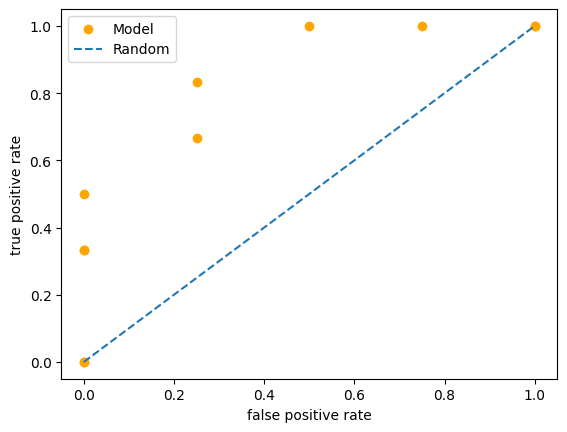

In [11]:
plt.scatter(df_scores.fpr, df_scores.tpr, linestyle='-',color='orange', label='Model')
#plt.plot(df_scores.fpr, df_scores.tpr, linestyle='-',color='orange', label='Model')
#plt.plot([0, 1])
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

In [12]:
auc = round(abs(np.trapz(df_scores.tpr, df_scores.fpr)), 4)

In [13]:
auc

0.875

In [15]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.875